In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

essays = pd.read_csv('../data/intermediate/processed_essays.csv', index_col=0)

# Set the essay id as the index of the dataframe
essays.set_index('essay_id', inplace=True)

essays.head()

# binary classification

,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,misspelt,correct,length,lexical_diversity,n_sentences,nouns,verbs,adverbs,adjectives,n_top500
essay_id,,,,,,,,,,,,,,,
14834,6,There were many obstacles that the builders fa...,2.0,2.0,2.0,6,116,123,1.37,8,27,15,9,10,0
14835,6,"Him from the start, there would have been many...",3.0,3.0,3.0,11,169,180,1.55,9,41,25,12,13,0
14836,6,The builders of the Empire State Building face...,3.0,4.0,4.0,3,163,169,1.62,8,39,24,9,11,0
14837,6,In the passage The Mooring Mast by Marcia Amid...,1.0,1.0,1.0,18,175,199,1.69,11,34,25,8,5,0
14838,6,The builders of the Empire State Building face...,3.0,3.0,3.0,4,158,162,1.74,11,33,26,7,18,0


In [25]:
essays.domain1_score.unique()

array([2., 3., 4., 1., 0.])

1800


KeyError: 0

In [4]:
count

0

In [30]:
print(essays.index.name)

essay_id


In [31]:
essays=essays.reset_index(drop=True)

In [32]:
int(essays['essay_set'][0])

6

In [33]:
essays

,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,misspelt,correct,length,lexical_diversity,n_sentences,nouns,verbs,adverbs,adjectives,n_top500
0,6,There were many obstacles that the builders fa...,2.0,2.0,2.0,6,116,123,1.37,8,27,15,9,10,0
1,6,"Him from the start, there would have been many...",3.0,3.0,3.0,11,169,180,1.55,9,41,25,12,13,0
2,6,The builders of the Empire State Building face...,3.0,4.0,4.0,3,163,169,1.62,8,39,24,9,11,0
3,6,In the passage The Mooring Mast by Marcia Amid...,1.0,1.0,1.0,18,175,199,1.69,11,34,25,8,5,0
4,6,The builders of the Empire State Building face...,3.0,3.0,3.0,4,158,162,1.74,11,33,26,7,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,6,The one obstacle the builders had when trying ...,2.0,0.0,0.0,18,136,154,1.77,8,39,14,15,7,1
1796,6,Some of the problems with the constructing of ...,1.0,2.0,2.0,3,64,66,1.25,3,17,8,4,6,0
1797,6,The builders of the Empire State building face...,2.0,3.0,3.0,7,98,105,1.48,6,22,10,9,7,0
1798,6,The obstacles the builders of the Empire State...,2.0,1.0,2.0,2,66,68,1.26,2,13,10,3,5,0


In [9]:
type(essays)

pandas.core.frame.DataFrame

In [35]:
count=0

for e1 in range(0,len(essays)):
    #print(e1)
    if essays['essay_set'][count]==6:
        count=count+1
        #print(essays.index)
        #print(essays['nouns'][count])
print(count)

1800


In [36]:
##To check if the essay is of type set 6 or not. We have 1800 essays of set 6 out of 8 sets.
count=0
for index, row in essays.head(n=1800).iterrows():
    if essays['essay_set'][count]==6:
        print(index, row)
        count=count+1

0 essay_set                                                            6
essay                There were many obstacles that the builders fa...
rater1_domain1                                                       2
rater2_domain1                                                       2
domain1_score                                                        2
misspelt                                                             6
correct                                                            116
length                                                             123
lexical_diversity                                                 1.37
n_sentences                                                          8
nouns                                                               27
verbs                                                               15
adverbs                                                              9
adjectives                                                          10
n_to

Name: 257, dtype: object
258 essay_set                                                            6
essay                Based on the excerpt, the builders of the Empi...
rater1_domain1                                                       3
rater2_domain1                                                       4
domain1_score                                                        3
misspelt                                                            12
correct                                                            155
length                                                             168
lexical_diversity                                                 1.58
n_sentences                                                          9
nouns                                                               41
verbs                                                               20
adverbs                                                              8
adjectives                                      

Name: 533, dtype: object
534 essay_set                                                            6
essay                In the excerpt "The Mooring Mast" by Marcia Am...
rater1_domain1                                                       1
rater2_domain1                                                       2
domain1_score                                                        2
misspelt                                                            17
correct                                                            152
length                                                             171
lexical_diversity                                                  1.6
n_sentences                                                          8
nouns                                                               32
verbs                                                               25
adverbs                                                              4
adjectives                                      

Name: 775, dtype: object
776 essay_set                                                            6
essay                The obstacles that the builders of the Empire ...
rater1_domain1                                                       4
rater2_domain1                                                       4
domain1_score                                                        4
misspelt                                                            23
correct                                                            210
length                                                             238
lexical_diversity                                                 1.64
n_sentences                                                         14
nouns                                                               55
verbs                                                               27
adverbs                                                             11
adjectives                                      

Name: 994, dtype: object
995 essay_set                                                            6
essay                The builders faced many challenging obstacles ...
rater1_domain1                                                       0
rater2_domain1                                                       1
domain1_score                                                        1
misspelt                                                             7
correct                                                            122
length                                                             129
lexical_diversity                                                 1.72
n_sentences                                                          5
nouns                                                               30
verbs                                                               18
adverbs                                                              7
adjectives                                      

Name: 1231, dtype: object
1232 essay_set                                                            6
essay                The task of allowing dirigibles to dock on The...
rater1_domain1                                                       2
rater2_domain1                                                       3
domain1_score                                                        3
misspelt                                                             9
correct                                                            127
length                                                             139
lexical_diversity                                                 1.51
n_sentences                                                          9
nouns                                                               33
verbs                                                               16
adverbs                                                              6
adjectives                                    

Name: 1504, dtype: object
1505 essay_set                                                            6
essay                The idea of the Empire State building being us...
rater1_domain1                                                       3
rater2_domain1                                                       3
domain1_score                                                        3
misspelt                                                            12
correct                                                            136
length                                                             151
lexical_diversity                                                 1.44
n_sentences                                                          6
nouns                                                               30
verbs                                                               23
adverbs                                                             12
adjectives                                    

Name: 1756, dtype: object
1757 essay_set                                                            6
essay                Based on the excerpt, the morning mast there w...
rater1_domain1                                                       2
rater2_domain1                                                       1
domain1_score                                                        2
misspelt                                                            12
correct                                                             96
length                                                             108
lexical_diversity                                                 1.35
n_sentences                                                         10
nouns                                                               24
verbs                                                               18
adverbs                                                              7
adjectives                                    

In [37]:
def binaryClassification(v):
    if v < 3.0:
        v = 0.0
    elif v >= 3.0:
        v = 1.0
    return v

essays['domain1_score'] = essays['domain1_score'].map(binaryClassification)

In [38]:
essays.domain1_score.unique()

array([0., 1.])

In [47]:
X = essays.drop(['domain1_score', 'essay_set', 'essay','rater1_domain1', 'rater2_domain1'], axis=1)
y = essays['domain1_score']

,misspelt,correct,length,lexical_diversity,n_sentences,nouns,verbs,adverbs,adjectives,n_top500
0,6,116,123,1.37,8,27,15,9,10,0
1,11,169,180,1.55,9,41,25,12,13,0
2,3,163,169,1.62,8,39,24,9,11,0
3,18,175,199,1.69,11,34,25,8,5,0
4,4,158,162,1.74,11,33,26,7,18,0
...,...,...,...,...,...,...,...,...,...,...
1795,18,136,154,1.77,8,39,14,15,7,1
1796,3,64,66,1.25,3,17,8,4,6,0
1797,7,98,105,1.48,6,22,10,9,7,0
1798,2,66,68,1.26,2,13,10,3,5,0


In [48]:
essays

,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,misspelt,correct,length,lexical_diversity,n_sentences,nouns,verbs,adverbs,adjectives,n_top500
0,6,There were many obstacles that the builders fa...,2.0,2.0,0.0,6,116,123,1.37,8,27,15,9,10,0
1,6,"Him from the start, there would have been many...",3.0,3.0,1.0,11,169,180,1.55,9,41,25,12,13,0
2,6,The builders of the Empire State Building face...,3.0,4.0,1.0,3,163,169,1.62,8,39,24,9,11,0
3,6,In the passage The Mooring Mast by Marcia Amid...,1.0,1.0,0.0,18,175,199,1.69,11,34,25,8,5,0
4,6,The builders of the Empire State Building face...,3.0,3.0,1.0,4,158,162,1.74,11,33,26,7,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,6,The one obstacle the builders had when trying ...,2.0,0.0,0.0,18,136,154,1.77,8,39,14,15,7,1
1796,6,Some of the problems with the constructing of ...,1.0,2.0,0.0,3,64,66,1.25,3,17,8,4,6,0
1797,6,The builders of the Empire State building face...,2.0,3.0,1.0,7,98,105,1.48,6,22,10,9,7,0
1798,6,The obstacles the builders of the Empire State...,2.0,1.0,0.0,2,66,68,1.26,2,13,10,3,5,0


In [49]:
X

,misspelt,correct,length,lexical_diversity,n_sentences,nouns,verbs,adverbs,adjectives,n_top500
0,6,116,123,1.37,8,27,15,9,10,0
1,11,169,180,1.55,9,41,25,12,13,0
2,3,163,169,1.62,8,39,24,9,11,0
3,18,175,199,1.69,11,34,25,8,5,0
4,4,158,162,1.74,11,33,26,7,18,0
...,...,...,...,...,...,...,...,...,...,...
1795,18,136,154,1.77,8,39,14,15,7,1
1796,3,64,66,1.25,3,17,8,4,6,0
1797,7,98,105,1.48,6,22,10,9,7,0
1798,2,66,68,1.26,2,13,10,3,5,0


In [50]:
# split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [51]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_pred, y_test)
accuracy_entropy

0.8111111111111111

In [52]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_pred, y_test)
accuracy_gini

0.8333333333333334

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=2)

# split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Compute the array containing the 10-folds CV MSEs
Accuracy_CV_scores = cross_val_score(dt_entropy, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1) 

Accuracy_CV_scores

array([0.79861111, 0.82986111, 0.84027778, 0.80208333, 0.81597222])

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

# Set seed for reproducibility
SEED=3

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=5)

# Instantiate dt
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=SEED)


# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [56]:
# split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_pred, y_test) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.825
K Nearest Neighbours : 0.803
Classification Tree : 0.831


C:\Users\shahz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_pred, y_test)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.836


C:\Users\shahz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# Instantiate dt
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=0.016, random_state=4)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=12)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_pred, y_test)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.86


In [59]:
# split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Instantiate dt
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=0.016, random_state=4)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1, random_state=13)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_pred, y_test)

# Extract the OOB accuracy from bc
oob_accuracy = bc.oob_score_

print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

print('OOB accuracy of bc: {:.2f}'.format(oob_accuracy))

Test set accuracy of bc: 0.84
OOB accuracy of bc: 0.82


In [60]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Instantiate rf
rf = RandomForestClassifier(criterion='gini', random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestClassifier(random_state=2)

In [61]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [62]:
from sklearn.model_selection import RandomizedSearchCV

# criterion for information gain
criterion = ['gini', 'entropy']

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'criterion': ['gini', 'entropy'],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [63]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=2),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [64]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'criterion': 'gini',
 'bootstrap': True}

#### Base Model

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate rf
rf = RandomForestClassifier(criterion='entropy', random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train)

# predict
y_pred = rf.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

=== Confusion Matrix ===
[[ 75  37]
 [ 21 227]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.78      0.67      0.72       112
         1.0       0.86      0.92      0.89       248

    accuracy                           0.84       360
   macro avg       0.82      0.79      0.80       360
weighted avg       0.84      0.84      0.84       360





#### Random Search Model

In [66]:
# Instantiate rf with best params from Random Search
rf_random = RandomForestClassifier(criterion='entropy', 
                            n_estimators=800, 
                            min_samples_leaf=4, 
                            min_samples_split=5, 
                            max_features='sqrt',
                            max_depth=None,
                            bootstrap=True,
                            random_state=2)

# Fit rf to the training set    
rf_random.fit(X_train, y_train)

# predict
y_pred = rf_random.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

=== Confusion Matrix ===
[[ 74  38]
 [ 19 229]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.80      0.66      0.72       112
         1.0       0.86      0.92      0.89       248

    accuracy                           0.84       360
   macro avg       0.83      0.79      0.81       360
weighted avg       0.84      0.84      0.84       360





In [67]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8416666666666667


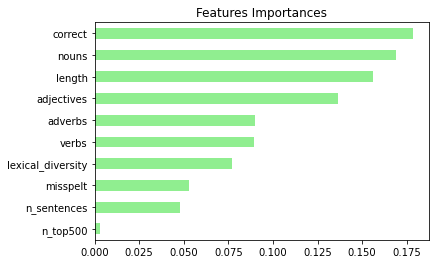

In [68]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf_random.feature_importances_, index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()


# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()